# SEIE Survey Data Analysis 

## Table of Contents<a id="1.1_Table_of_Contents"></a>
* [1 SEIE Survey Data Analysis](#1_SEIE_Survey_Data_Analysis)
    * [1.2 Load Data](#1.2_Load_Data)
    * [1.3 Explore Data](#1.3_Explore_Data)
    * [1.4 Basic Plots](#1.4_Basic_Plots)
    * [1.5 Word Cloud](#1.5_Word_Cloud)
    * [1.6 Count Vectorizer](#1.6_Count_Vectorizer)
    * [1.7 TF-IDF Vectorizer](#1.7_TF_-_IDF_Vectorizer)

In [1]:
#importing necessary modules
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from wordcloud import WordCloud

## Load Data<a id='1.2_Load_Data'></a>

In [2]:
data = pd.read_csv('./data/SEIEsurvey.csv')

In [3]:
data.head()

Timestamp  \
0  7/12/2020 0:54:17   
1  7/6/2020 19:56:49   
2   7/7/2020 1:01:24   
3  7/6/2020 21:19:29   
4  7/7/2020 15:42:04   

  What ethnic group do you identify with? (Your response is optional)  \
0                                     Latino/Hispano                    
1                                     Latino/Hispano                    
2                                    White/Caucasian                    
3                                     Latino/Hispano                    
4                                    White/Caucasian                    

  Our Department does not discriminate on the basis of gender identity or expression. In order to track the effectiveness of our efforts and ensure we consider the needs of all residents of Los Angeles, please consider the following optional question: How do you gender identify?  \
0                                               Male                                                                                                                                                                                                                                      
1                                             Female                                                                                                                                                                                                                                      
2                                               Male                                                                                                                                                                                                                                      
3                                               Male                                                                                                                                                                                                                                      
4                                             Female                                                                                                                                                                                                                                      

  If you chose "Prefer to self-describe" to the previous question, please do so here.  \
0                                                NaN                                    
1                                                NaN                                    
2                                                NaN                                    
3                                                NaN                                    
4                                                NaN                                    

  What Neighborhood Council are you from?  \
0                                  Arleta   
1                             Arroyo Seco   
2                             Arroyo Seco   
3                         Atwater Village   
4                         Atwater Village   

  For how many years have you been a member of your NC Board?  \
0                                          5-7 Years            
1                                           0-1 Year            
2                                          2-4 Years            
3                                          2-4 Years            
4                                          5-7 Years            

  Please select the option that best represents your point of view.  \
0  Our communities have a high level of social an...                  
1  Our communities have a high level of social an...                  
2  Our communities have a moderate level economic...                  
3  Our communities have a high level of social an...                  
4  Our communitites have experienced an increase ...                  

                                             HOUSING  \
0      Cut taxes and regulations to create more 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                       --------------  ----- 
 0   Timestamp                                                                                                                                                                                                                               

## Explore Data<a id='1.3_Explore_Data'></a>

In [5]:
data.shape

(696, 20)

In [6]:
data.describe()

Timestamp  \
count                 686   
unique                683   
top     7/8/2020 14:35:36   
freq                    2   

       What ethnic group do you identify with? (Your response is optional)  \
count                                                 670                    
unique                                                 37                    
top                                       White/Caucasian                    
freq                                                  343                    

       Our Department does not discriminate on the basis of gender identity or expression. In order to track the effectiveness of our efforts and ensure we consider the needs of all residents of Los Angeles, please consider the following optional question: How do you gender identify?  \
count                                                 690                                                                                                                                                                                                                                      
unique                                                  7                                                                                                                                                                                                                                      
top                                                  Male                                                                                                                                                                                                                                      
freq                                                  337                                                                                                                                                                                                                                      

       If you chose "Prefer to self-describe" to the previous question, please do so here.  \
count                                                  15                                    
unique                                                 15                                    
top                                               Pastor                                     
freq                                                    1                                    

       What Neighborhood Council are you from?  \
count                                      696   
unique                                      98   
top                                 West Hills   
freq                                        20   

       For how many years have you been a member of your NC Board?  \
count                                                 696            
unique                                                  7            
top                                             2-4 Years            
freq                                                  248            

       Please select the option that best represents your point of view.  \
count                                                 686                  
unique                                                  7                  
top     Our communities have a high level of social an...                  
freq                                                  299                  

                                                  HOUSING  \
count                                                 693   
unique                                                167   
top     Address rent control and evictions, Home owner...   
freq                                                  156   

                   JOBS / BUSINESS / ECONOMIC DEVELOPMENT  \
count                                                 689   
unique                                                199   
top     Assistance with lending and financial institut...   
freq                              

In [7]:
data.columns

Index(['Timestamp',
       'What ethnic group do you identify with? (Your response is optional)',
       'Our Department does not discriminate on the basis of gender identity or expression. In order to track the effectiveness of our efforts and ensure we consider the needs of all residents of Los Angeles, please consider the following optional question: How do you gender identify?',
       'If you chose "Prefer to self-describe" to the previous question, please do so here.',
       'What Neighborhood Council are you from?',
       'For how many years have you been a member of your NC Board?',
       'Please select the option that best represents your point of view.',
       'HOUSING', 'JOBS / BUSINESS / ECONOMIC DEVELOPMENT',
       'SCHOOLS, EDUCATION & ARTS / CULTURE', 'QUALITY OF LIFE',
       'SOCIAL & SUPPORTIVE SERVICES / MENTAL HEALTH',
       'PUBLIC SAFETY & EMERGENCY PREPAREDNESS',
       'INFRASTRUCTURE & SUSTAINABILITY',
       'Of the categories of possible City budget ini

In [8]:
data.isnull().sum() / data.shape[0]

Timestamp                                                                                                                                                                                                                                                                                                      0.014368
What ethnic group do you identify with? (Your response is optional)                                                                                                                                                                                                                                            0.037356
Our Department does not discriminate on the basis of gender identity or expression. In order to track the effectiveness of our efforts and ensure we consider the needs of all residents of Los Angeles, please consider the following optional question: How do you gender identify?                          0.008621
If you chose "Prefer to self-describe" to the previous question,

## Basic Plots<a id='1.4_Basic_Plots'></a>

In [9]:
data.iloc[:,1].value_counts()

White/Caucasian                                                                          343
Latino/Hispano                                                                           107
Black/African American                                                                    91
Asian/Pacific Islander                                                                    51
Multiethnic                                                                               36
Native American                                                                            3
Middle Eastern                                                                             3
Jewish                                                                                     3
Arab American                                                                              2
Armenian                                                                                   2
Irrelevant                                                            

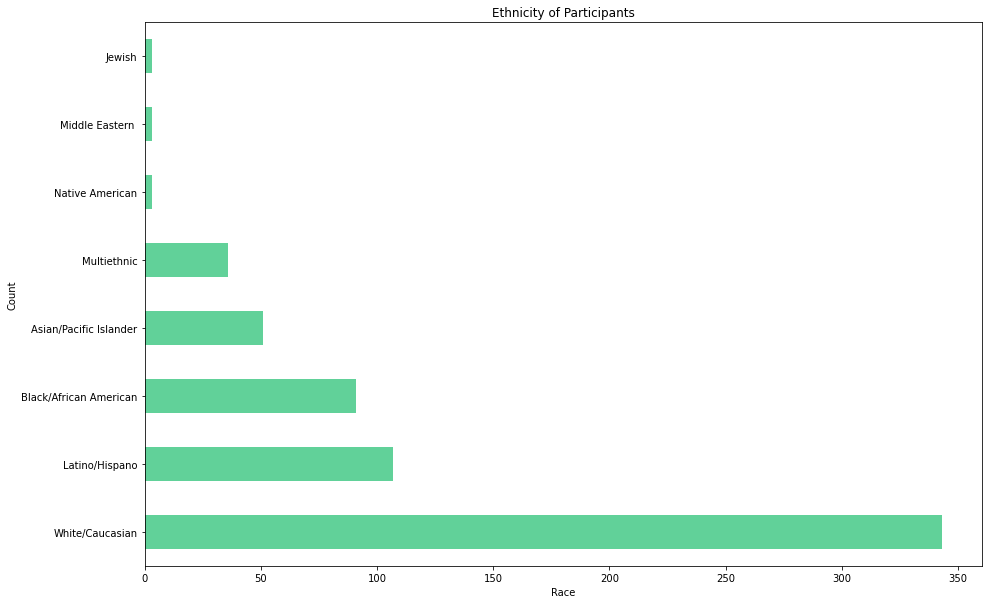

In [10]:
data.iloc[:,1].value_counts().head(8).plot(kind='barh', figsize=(15,10), color= '#61d199')
plt.title("Ethnicity of Participants")
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

In [11]:
data.iloc[:,2].value_counts()

Male                                                337
Female                                              317
Prefer not to say                                    21
Non-binary / Gender non-conforming / Genderfluid      6
Trans                                                 5
Prefer to self-describe (please use space below)      2
Mujer                                                 2
Name: Our Department does not discriminate on the basis of gender identity or expression. In order to track the effectiveness of our efforts and ensure we consider the needs of all residents of Los Angeles, please consider the following optional question: How do you gender identify?, dtype: int64

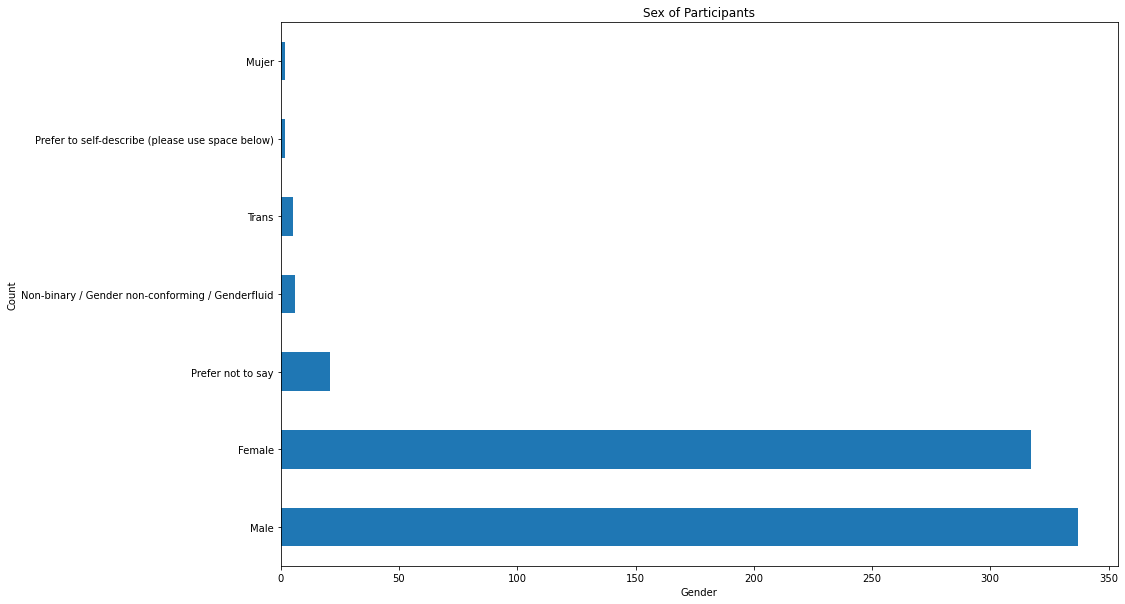

In [12]:
data.iloc[:,2].value_counts().plot(kind='barh', figsize=(15,10))
plt.title("Sex of Participants")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [13]:
data.iloc[:,5].value_counts()

2-4 Years           248
0-1 Year            235
5-7 Years           102
10 years or more     67
8-10 Years           42
2-4 Años              1
10 Años o más         1
Name: For how many years have you been a member of your NC Board?, dtype: int64

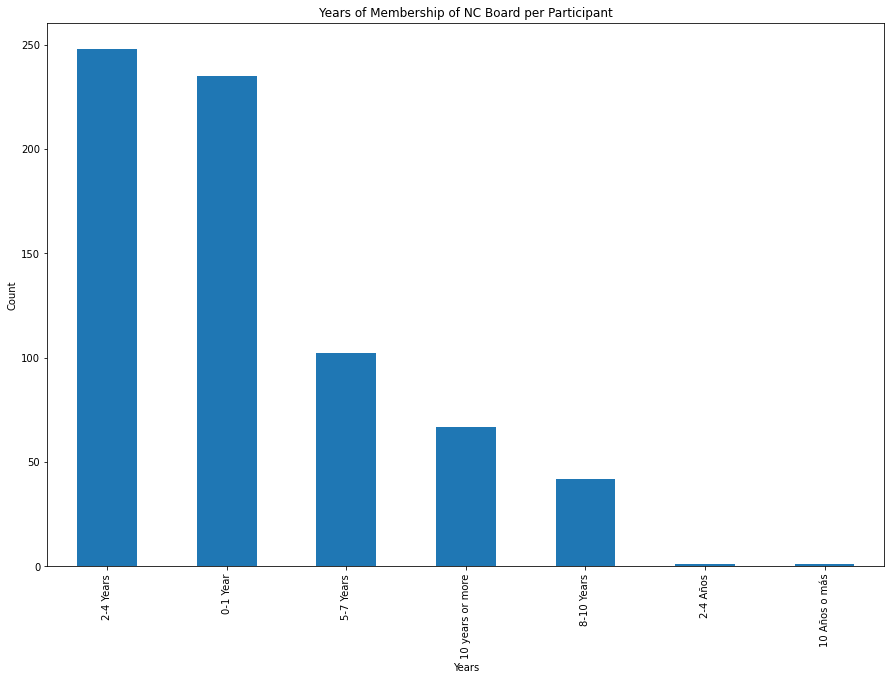

In [14]:
data.iloc[:,5].value_counts().plot(kind='bar', figsize=(15,10))
plt.title("Years of Membership of NC Board per Participant")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

In [15]:
data.iloc[:,6].value_counts()

Our communities have a high level of social and economic disparity issues.                299
Our communitites have experienced an increase in social and economic disparity issues.    160
Our communities have a moderate level economic social or economic disparity issues.       144
Our communities have a small level of social or economic disparity issues.                 56
Our communities have no social or economic disparity issues.                               24
5                                                                                           2
3                                                                                           1
Name: Please select the option that best represents your point of view., dtype: int64

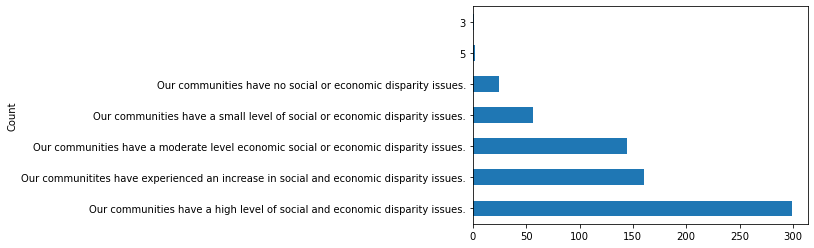

In [16]:
data.iloc[:,6].value_counts().plot(kind='barh')
plt.ylabel("Count")
plt.show()

In [17]:
df= data.fillna("")

In [18]:
df1 = data.apply(lambda x: x.astype(str).str.lower())

In [19]:
df1.iloc[1][6:19].values

array(['our communities have a high level of social and economic disparity issues.',
       'address rent control and evictions, address the unhoused, identify/support those in danger of becoming unhoused, preserve & increase supply of affordable housing',
       'create and promote living wage jobs, help for those seeking work, support equitable hiring and employee promotion practices',
       'youth recreation & development (youth centers, tutoring, college application support, etc), afterschool and/or child care programs, increase availability of educational/cultural spaces & programs (libraries, workshops)',
       'address the "digital divide" (improve individual or regional access to and fluency in internet/computers and related technologies), increased support for seniors with food, health, other services, increased support for families with food, health, other services, addressing food insecurity, addressing “food deserts” - communities that have inadequate access to food suppl

In [20]:
def wc(n):
    col = df1.iloc[:,n]
    return col.str.split().apply(len).mean()

In [21]:
word_lengths = []
cols = []
for i in range(1,20):
    cols.append(i)
    word_lengths.append(wc(i))

In [22]:
wc = pd.DataFrame({'col#':cols, 'word-counts':word_lengths})

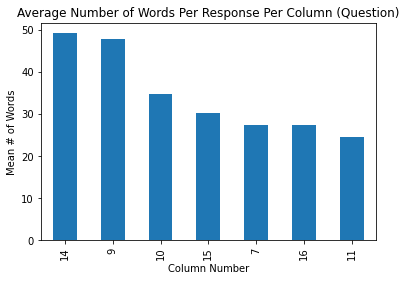

In [23]:
wc['word-counts'].sort_values(ascending=False).head(7).plot(kind='bar')
_ =plt.title("Average Number of Words Per Response Per Column (Question)")
plt.xlabel('Column Number')
plt.ylabel("Mean # of Words")
plt.show()

## Word Cloud <a id="1.5_Word_Cloud"></a>

In [24]:
def get_word_cloud(text):
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color="white").generate(str(text))
    fig = plt.figure(
        figsize= (40,30), 
        facecolor = 'k', 
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
        

## Count Vectorizer <a id="1.6_Count_Vectorizer"></a>

## unigrams from vectorized data

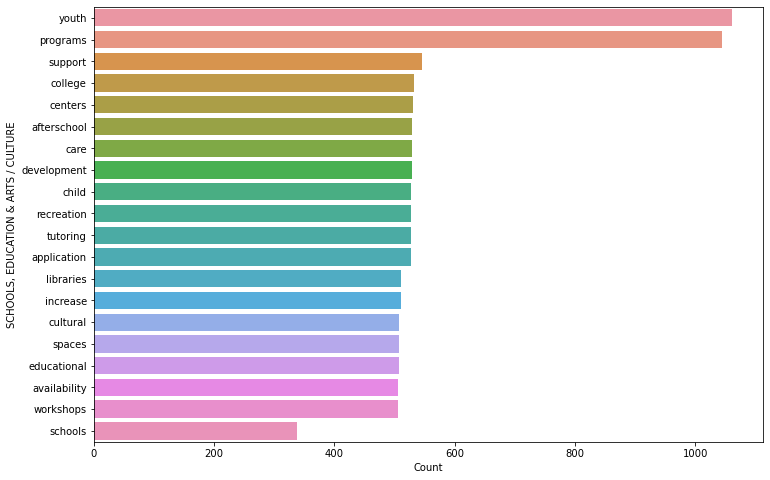

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer= "word", stop_words='english')
sparse_matrix= word_vectorizer.fit_transform(df.iloc[:,9])
freq = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(freq, index=word_vectorizer.get_feature_names(), columns= ['frequency'])
word = word.nlargest(columns = "frequency", n=20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y=word.index, x='frequency')
sns.set_context("poster")
ax.set(xlabel="Count", ylabel=df.columns[9])
plt.show()

## Bigrams from vectorized data

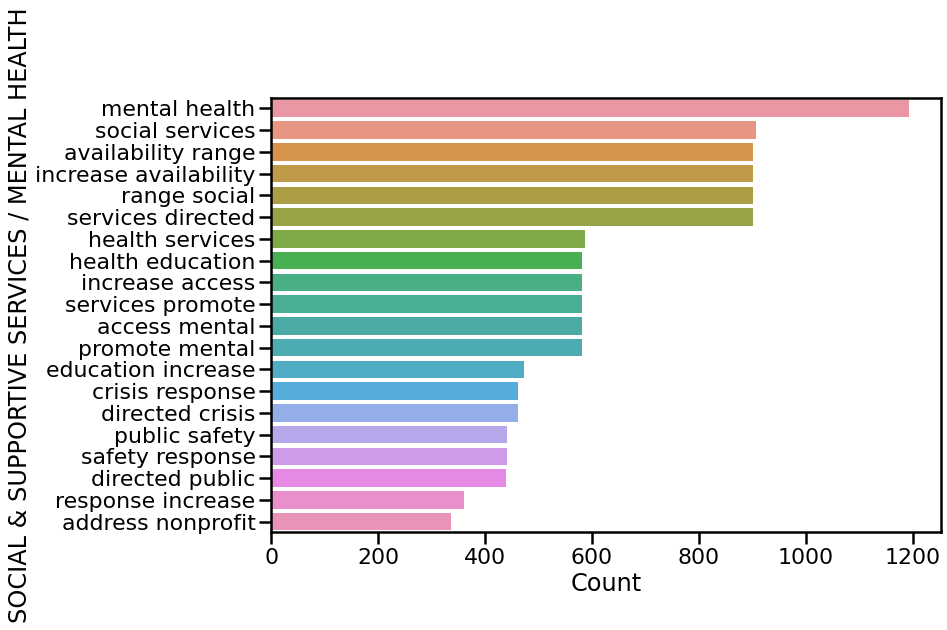

In [26]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer= "word", stop_words="english")
sparse_matrix= word_vectorizer.fit_transform(df.iloc[:,11])
freq = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(freq, index=word_vectorizer.get_feature_names(), columns= ['frequency'])
word = word.nlargest(columns = "frequency", n=20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y=word.index, x='frequency')
sns.set_context("poster")
ax.set(xlabel="Count", ylabel=df.columns[11])
plt.show()

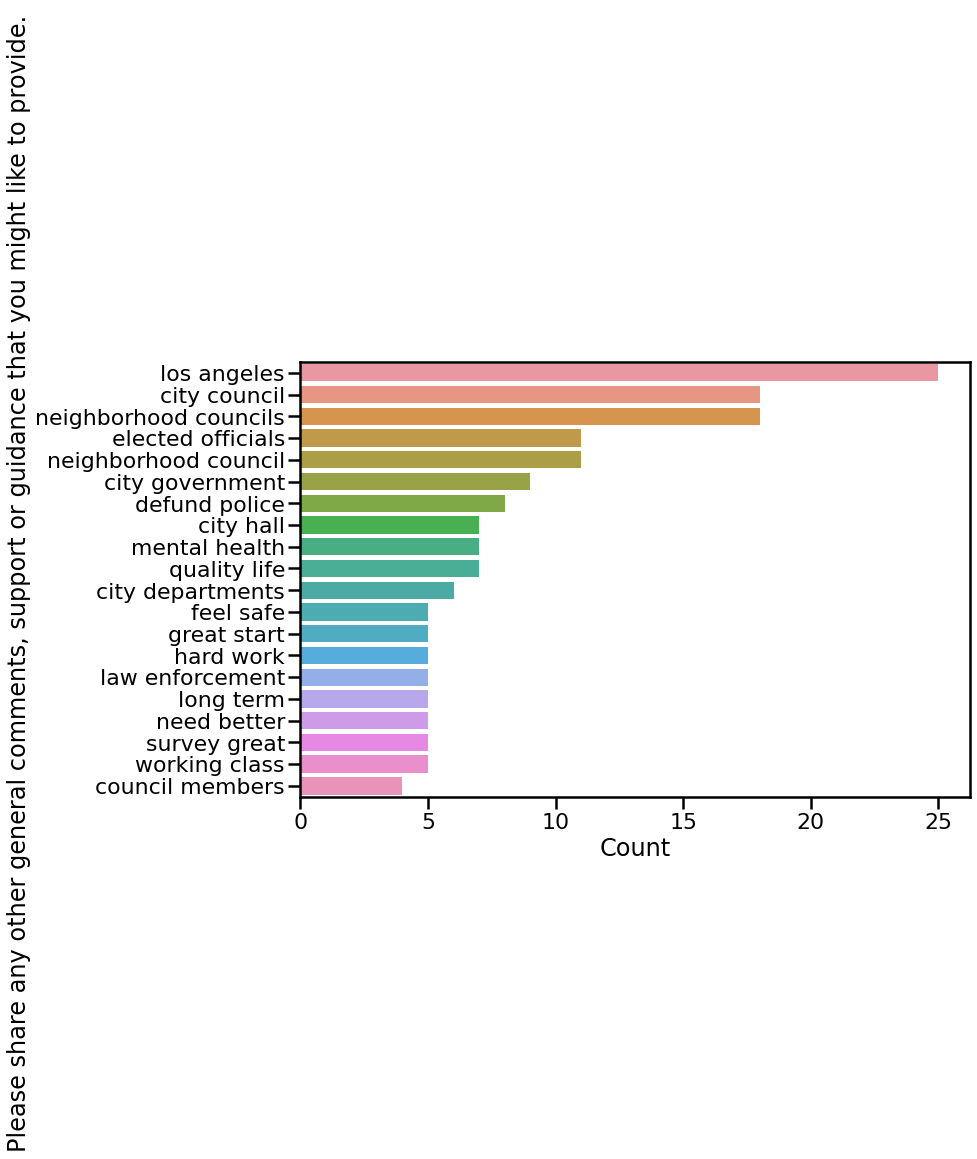

In [27]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer= "word", stop_words="english")
sparse_matrix= word_vectorizer.fit_transform(df.iloc[:,19])
freq = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(freq, index=word_vectorizer.get_feature_names(), columns= ['frequency'])
word = word.nlargest(columns = "frequency", n=20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y=word.index, x='frequency')
sns.set_context("poster")
ax.set(xlabel="Count", ylabel=df.columns[19])
plt.show()

## TF-IDF Vectorizer<a id="TF_-_IDF_Vectorizer"></a>

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfVectorizer(analyzer="word", ngram_range=(1,2), min_df=0, stop_words='english')
tfidf_matrix= vectorizer.fit_transform(df.iloc[:,11])
print(tfidf_matrix.toarray())

[[0.         0.         0.         ... 0.35222553 0.         0.37437369]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
feature_names = vectorizer.get_feature_names()
dense = tfidf_matrix.todense()
denselist = dense.tolist()
tfidf_df = pd.DataFrame(denselist, columns=feature_names)

In [30]:
tfidf_df.head()

30  30 90   47  5150  5150 people  5950  5950 72   72  72 hour   90  ...  \
0  0.0    0.0  0.0   0.0          0.0   0.0      0.0  0.0      0.0  0.0  ...   
1  0.0    0.0  0.0   0.0          0.0   0.0      0.0  0.0      0.0  0.0  ...   
2  0.0    0.0  0.0   0.0          0.0   0.0      0.0  0.0      0.0  0.0  ...   
3  0.0    0.0  0.0   0.0          0.0   0.0      0.0  0.0      0.0  0.0  ...   
4  0.0    0.0  0.0   0.0          0.0   0.0      0.0  0.0      0.0  0.0  ...   

   workers social  workers substitute  workers unhoused  working  \
0             0.0                 0.0               0.0      0.0   
1             0.0                 0.0               0.0      0.0   
2             0.0                 0.0               0.0      0.0   
3             0.0                 0.0               0.0      0.0   
4             0.0                 0.0               0.0      0.0   

   working functioning  world  world live     youth  youth adult  \
0                  0.0    0.0         0.0  0.352226          0.0   
1                  0.0    0.0         0.0  0.000000          0.0   
2                  0.0    0.0         0.0  0.000000          0.0   
3                  0.0    0.0         0.0  0.000000          0.0   
4                  0.0    0.0         0.0  0.000000          0.0   

   youth programs  
0        0.374374  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  

[5 rows x 1351 columns]

In [31]:
print(len(denselist), len(feature_names))

696 1351


In [32]:
#df_weights = pd.DataFrame({'word':feature_names, 'weights':tfidf_df})

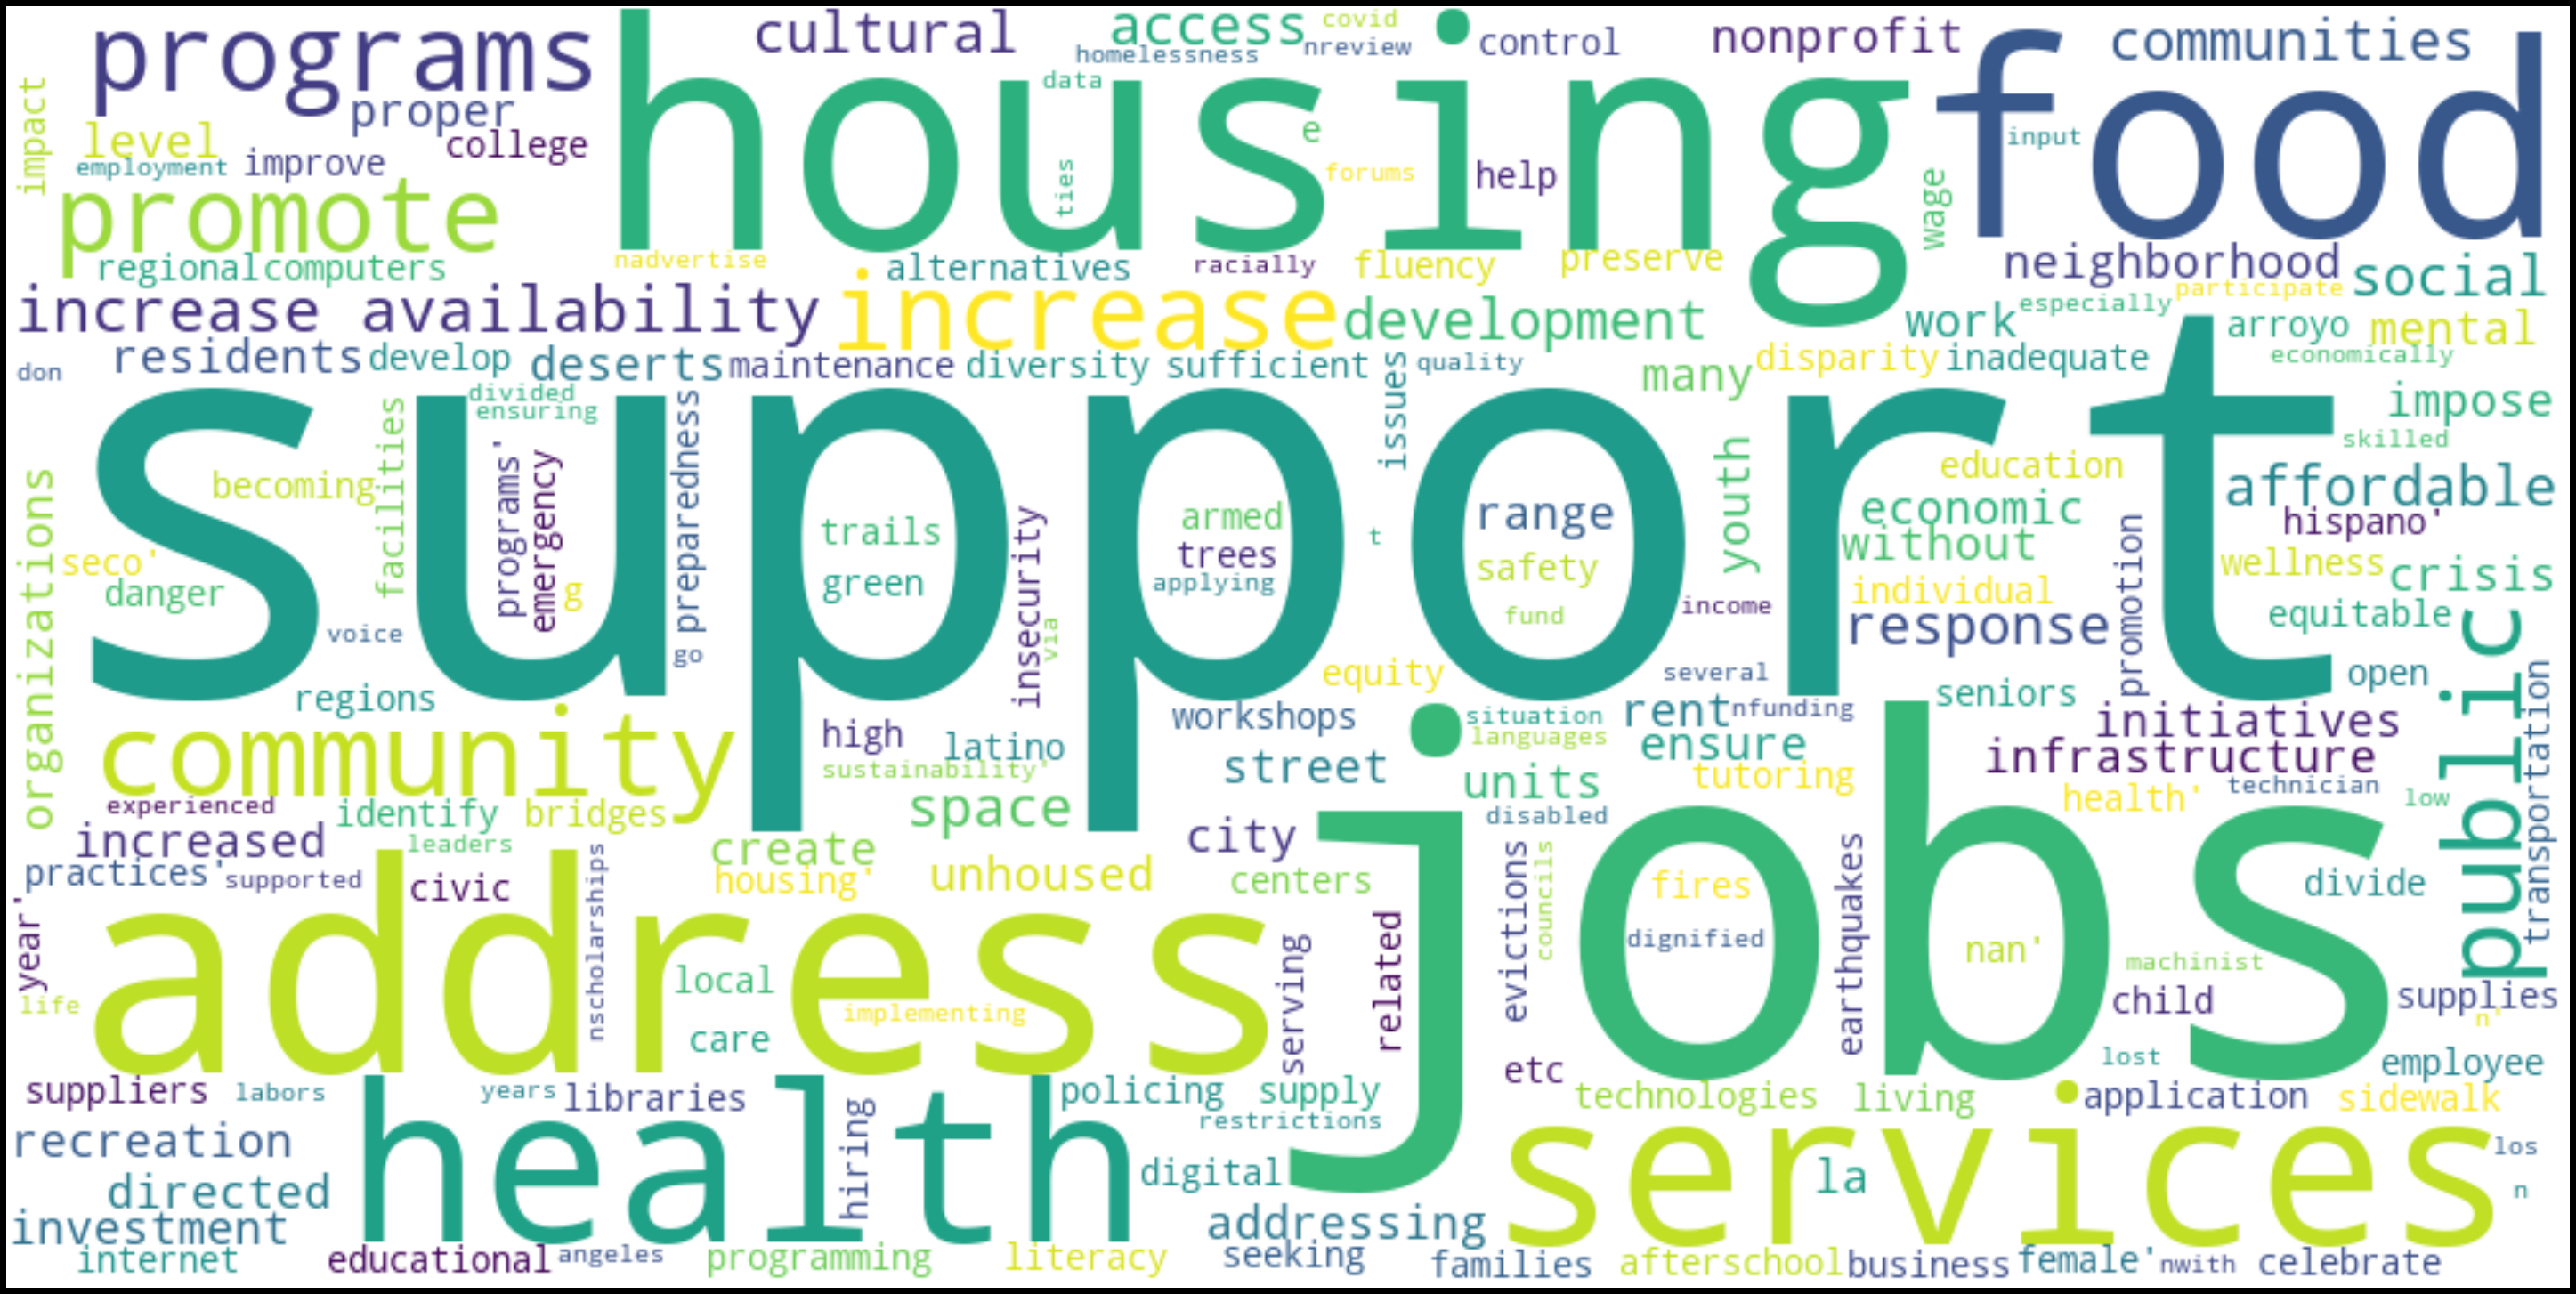

In [33]:
get_word_cloud(df1.iloc[1,1:19].values)

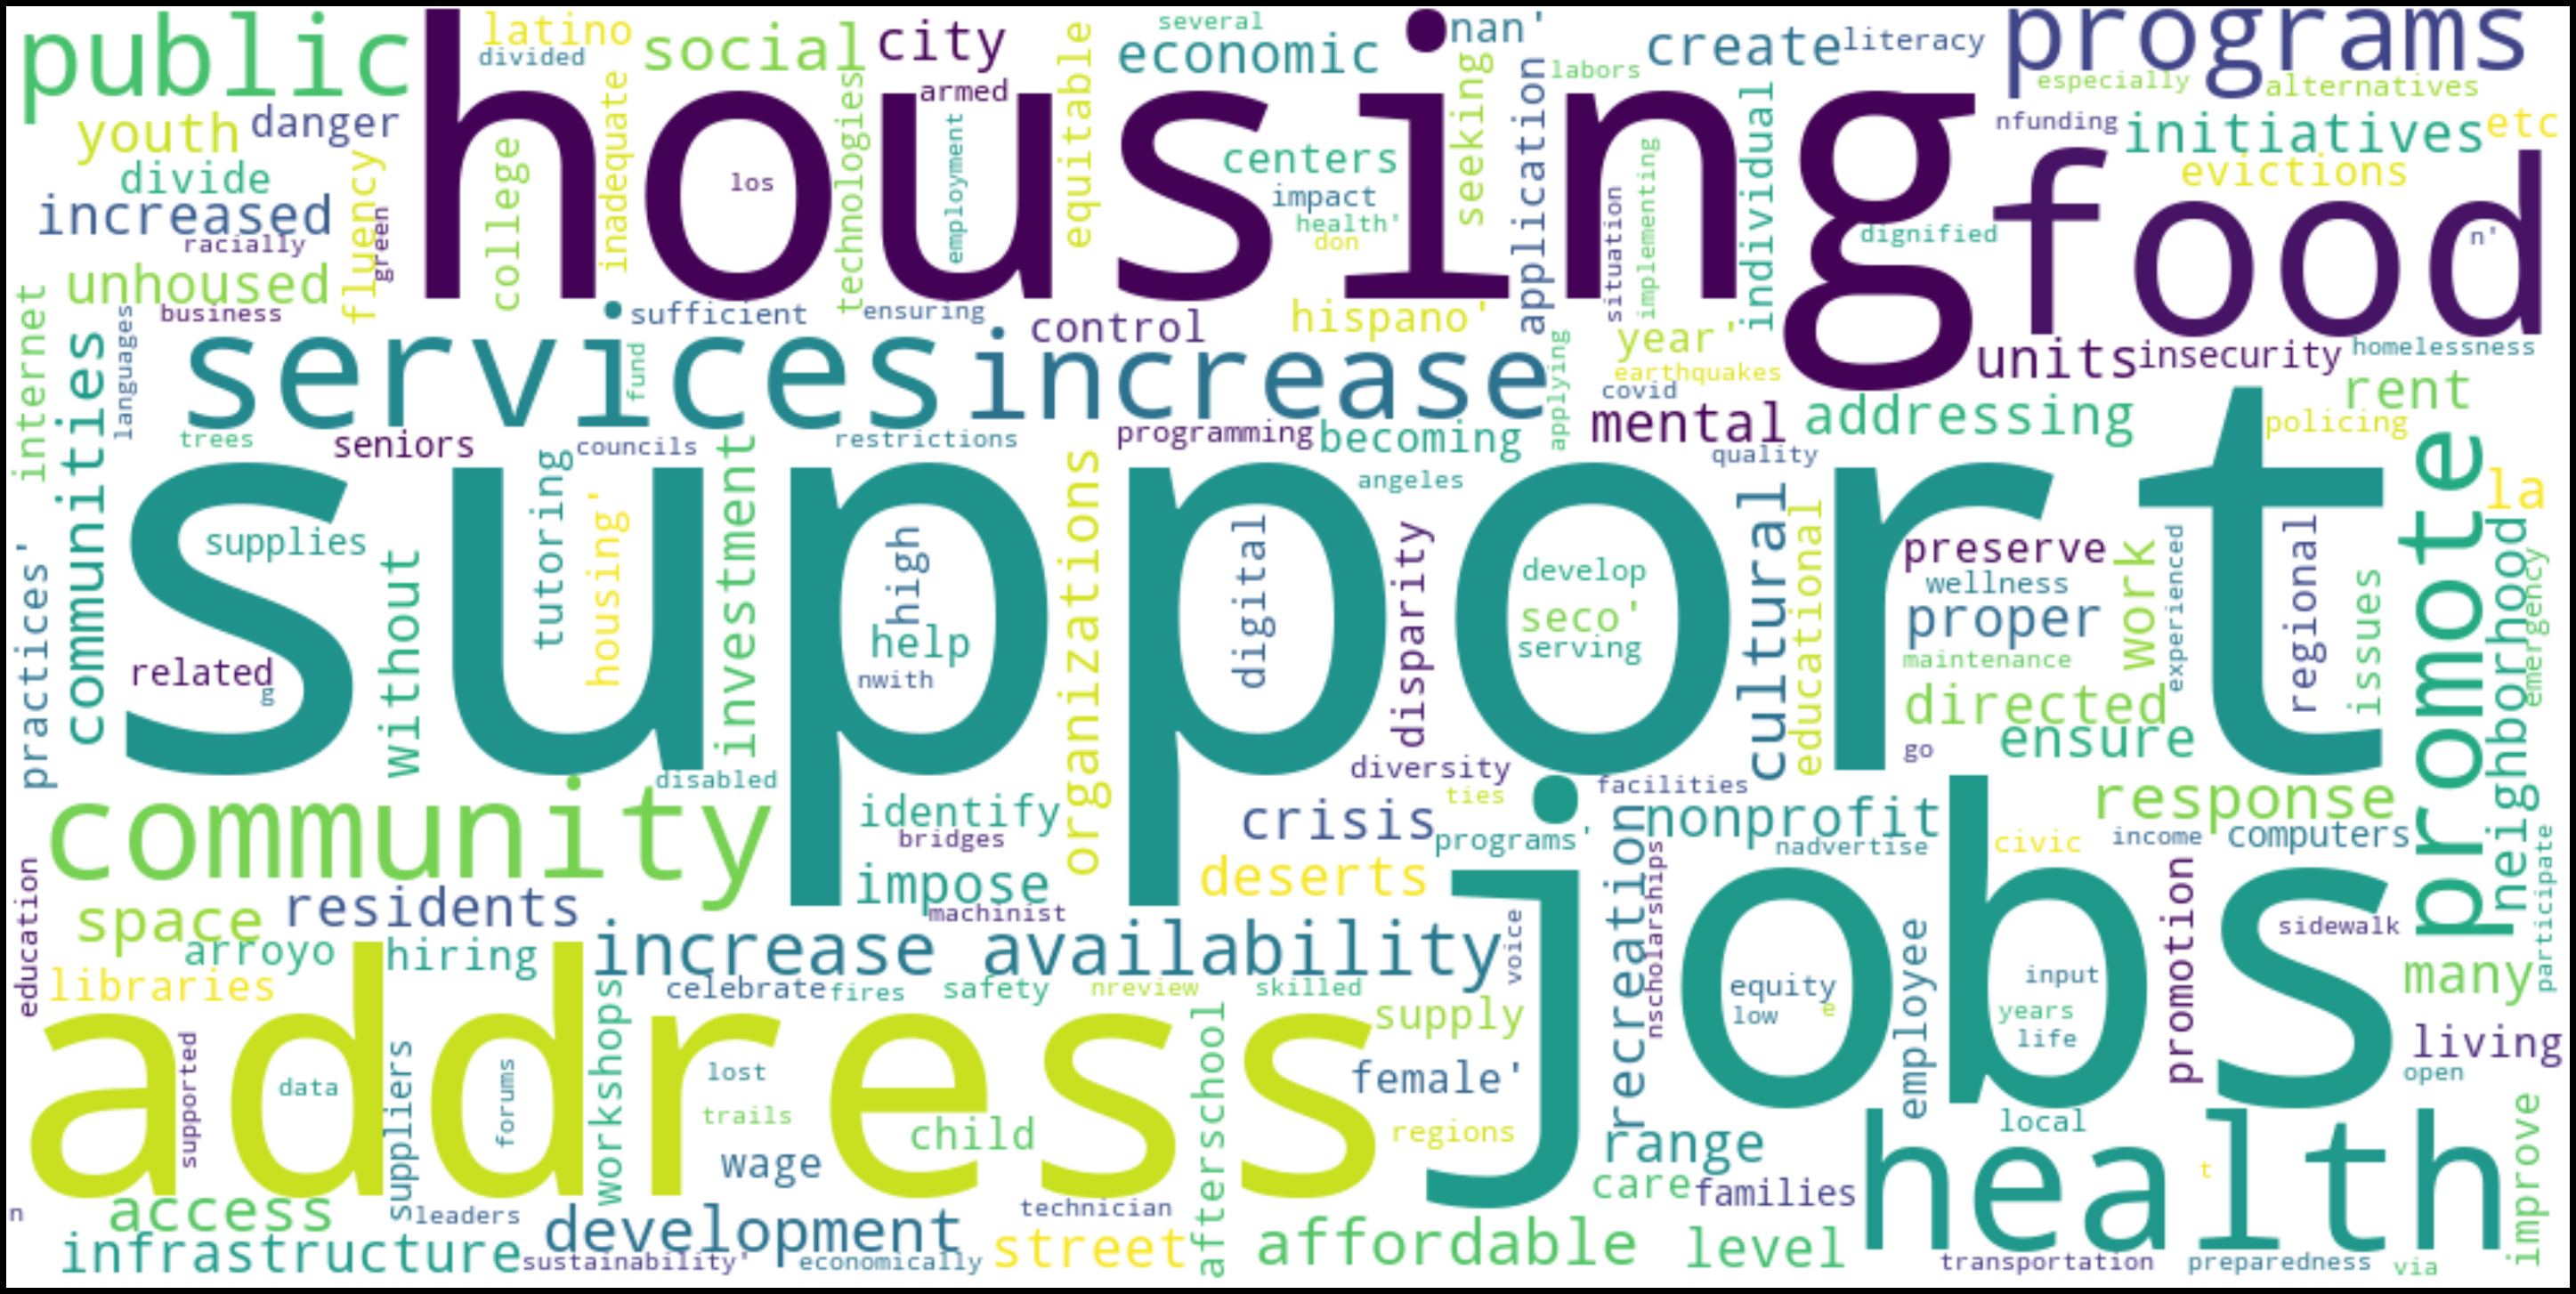

In [34]:
get_word_cloud(df1.iloc[1,1:19].values)

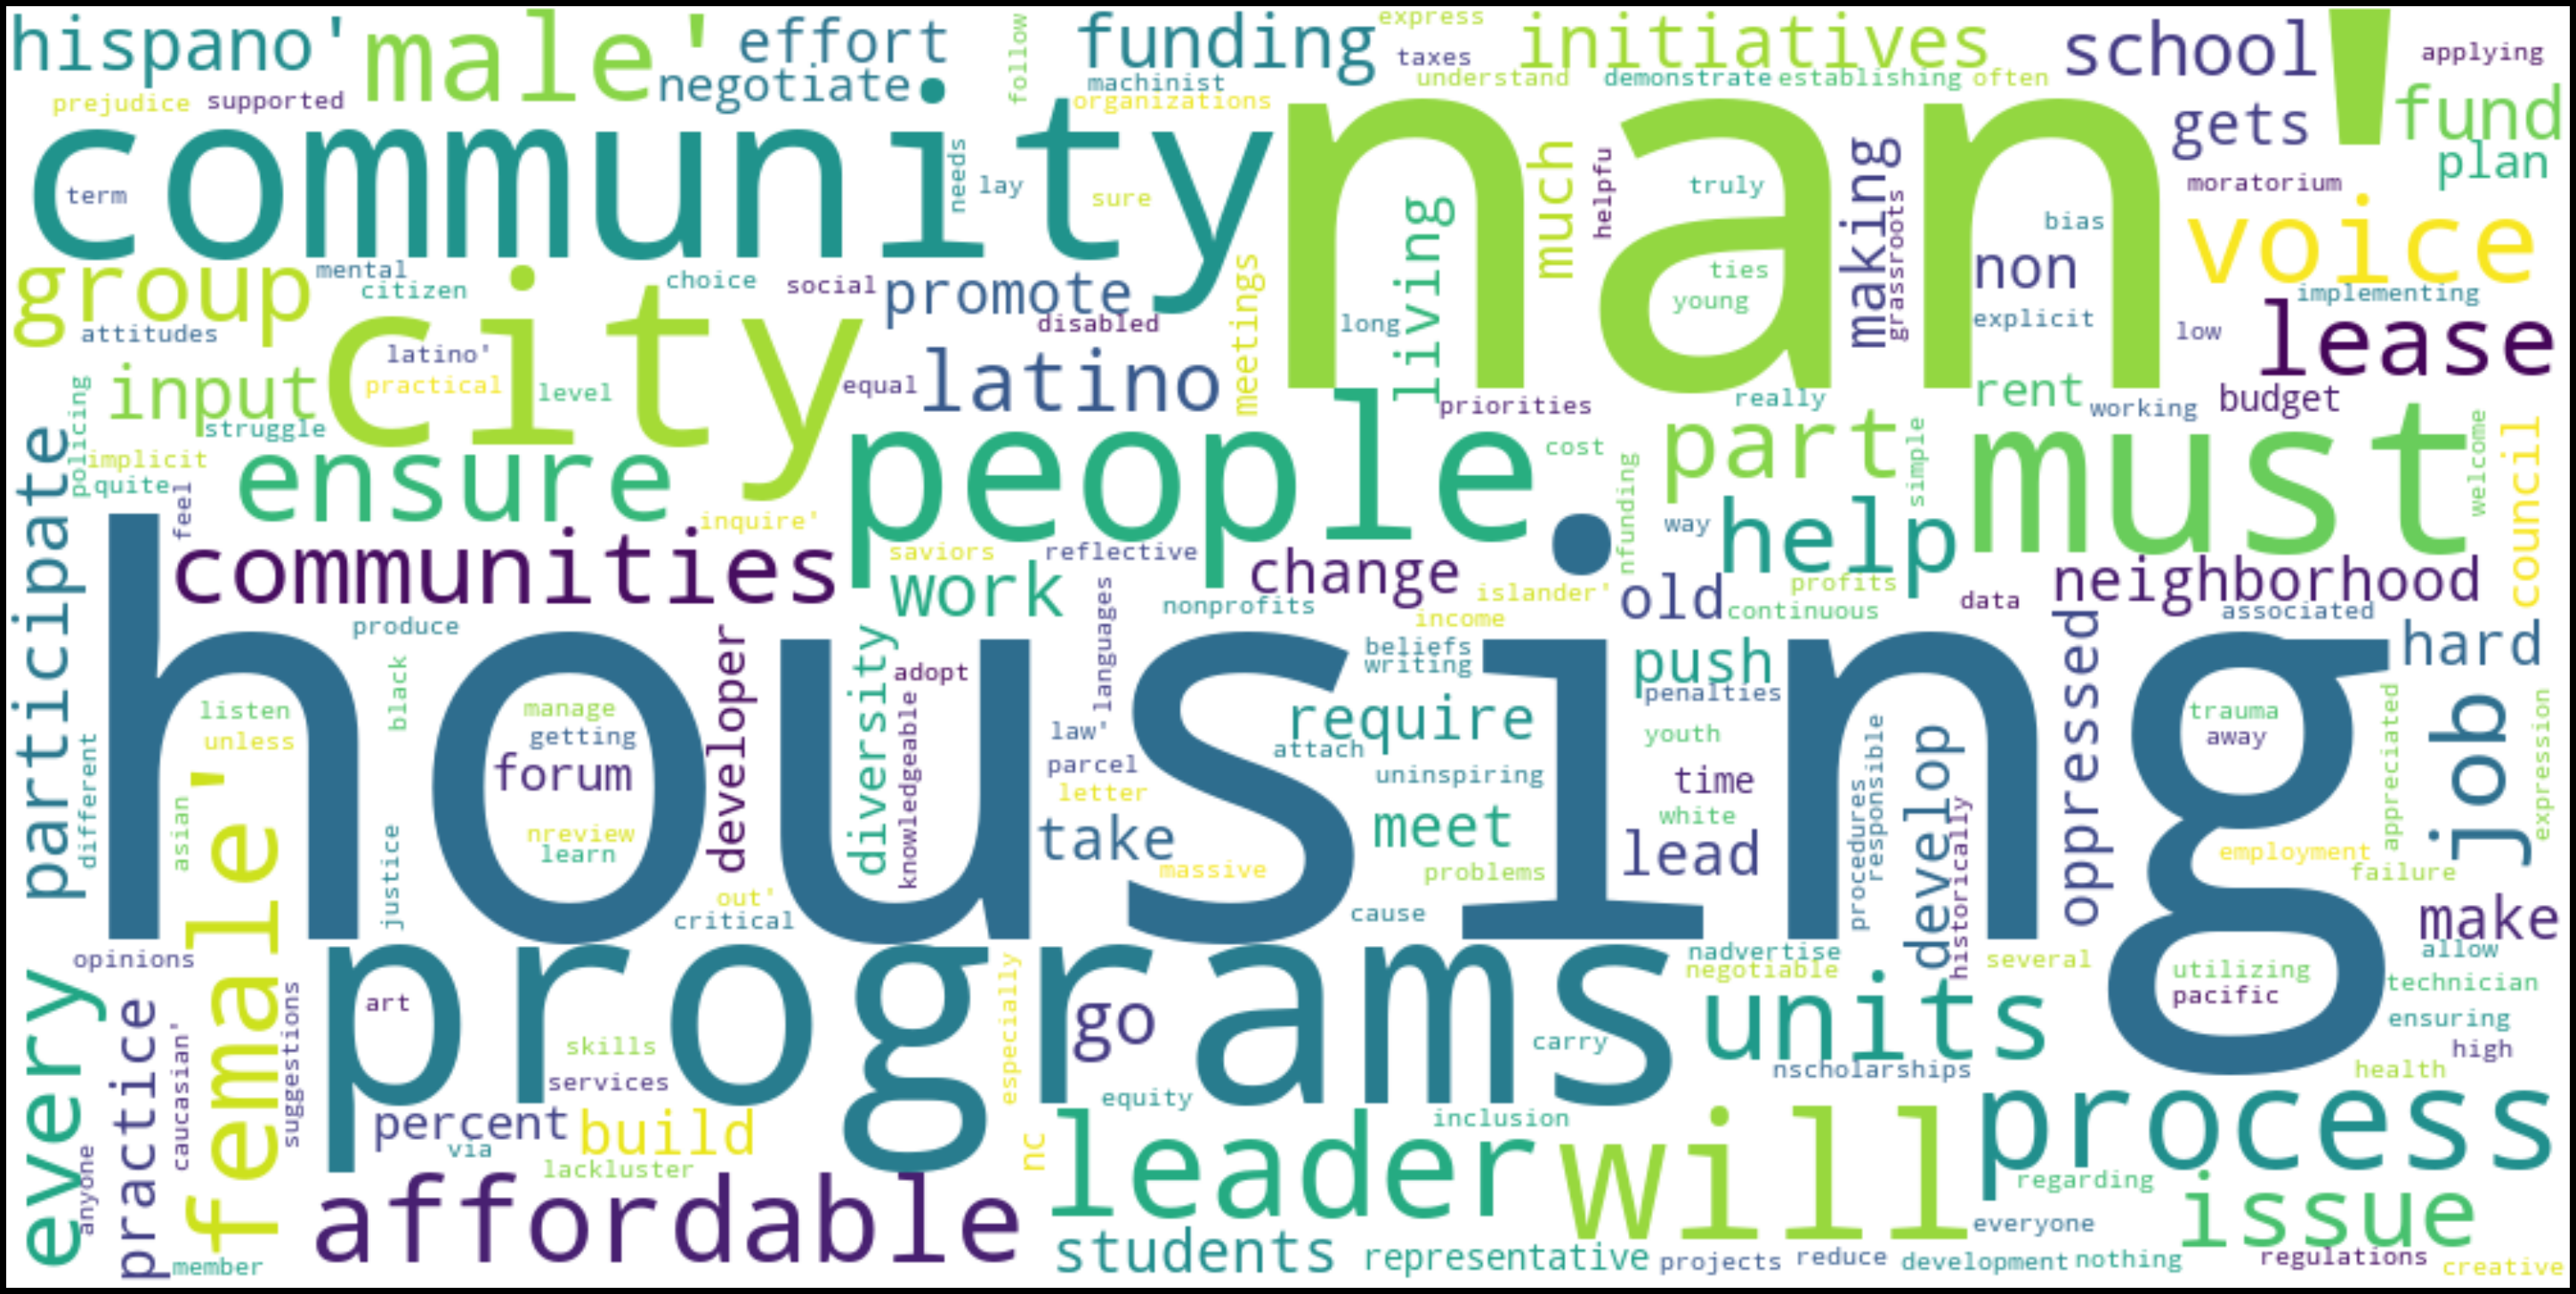

In [35]:
get_word_cloud(df1.iloc[:,1:19].values)

## Spacy

In [36]:
import spacy 
import en_core_web_sm
nlp = en_core_web_sm.load()


test = df1.iloc[1,6]
doc = nlp(test)

In [37]:
for token in doc: 
    print(token.text)
    
# [token.text for token in doc]  
# list of word tokens

our
communities
have
a
high
level
of
social
and
economic
disparity
issues
.


In [38]:
for word in doc:
    print(word.text, word.pos_, word.tag_)

our PRON PRP$
communities NOUN NNS
have VERB VBP
a DET DT
high ADJ JJ
level NOUN NN
of ADP IN
social ADJ JJ
and CCONJ CC
economic ADJ JJ
disparity NOUN NN
issues NOUN NNS
. PUNCT .


In [39]:
for word in doc.ents:
    print(word.text)

In [40]:
test2 = df1.iloc[1][6]
doc2 = nlp(test2)

for word in doc2.ents:
    print(word.text, word.label_)

## NLTK

In [41]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

sample_text = df.iloc[1,6]

In [42]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [43]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sathwikthecreator/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [44]:
sample_text = preprocess(sample_text)
sample_text

[('Our', 'PRP$'),
 ('communities', 'NNS'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('high', 'JJ'),
 ('level', 'NN'),
 ('of', 'IN'),
 ('social', 'JJ'),
 ('and', 'CC'),
 ('economic', 'JJ'),
 ('disparity', 'NN'),
 ('issues', 'NNS'),
 ('.', '.')]

In [45]:
# from codecademy 
from nltk.corpus import wordnet
def get_part_of_speech(word):
    part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts['n'] = len([item for item in part_of_speech if item.pos() == 'n'])
    pos_counts['v'] = len([item for item in part_of_speech if item.pos() == 'v'])
    pos_counts['a'] = len([item for item in part_of_speech if item.pos() == 'a'])
    pos_counts['r'] = len([item for item in part_of_speech if item.pos() == 'r'])
    
    most_likely_part = pos_counts.most_common(1)[0][0]
    return most_likely_part

In [46]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter

#from part_of_speech import get_part_of_speech

nltk.download('stopwords')
nltk.download('wordnet')
text = data.iloc[55][10]

cleaned = re.sub("\W+", ' ', text).lower()
tokenized = word_tokenize(cleaned)

stop_words = stopwords.words('english')
filtered  = [word for word in tokenized if word not in stop_words]

normalizer = WordNetLemmatizer()
normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in filtered]

bag_of_words = Counter(normalized)
print(bag_of_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sathwikthecreator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sathwikthecreator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Counter({'increase': 1, 'support': 1, 'family': 1, 'food': 1, 'health': 1, 'service': 1, 'recreation': 1, 'wellness': 1, 'program': 1})


In [47]:
# Language Models: N-Gram using NLTK
from nltk.util import ngrams 

looking_bigrams = ngrams(tokenized, 2)
looking_bigrams_freq = Counter(looking_bigrams)

looking_trigrams = ngrams(tokenized, 3)
looking_trigrams_freq = Counter(looking_trigrams)

print(looking_bigrams_freq.most_common(3))
print(looking_trigrams_freq.most_common(3))

[(('increased', 'support'), 1), (('support', 'for'), 1), (('for', 'families'), 1)]
[(('increased', 'support', 'for'), 1), (('support', 'for', 'families'), 1), (('for', 'families', 'with'), 1)]


In [48]:
def pre_process(text):
    cleaned = re.sub(r'\W+', ' ',text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_part_of_speech(token)) for token in tokenized]
    filtered = [word for word in normalized if word not in stop_words]
    return " ".join(filtered)